In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


## Generate some random data to train a simple linear regression model

In [4]:
np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


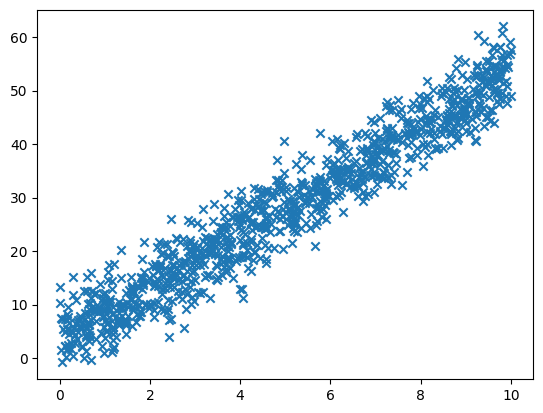

In [5]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(X.dtype)
print(y.dtype)

plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Set up the code

In [8]:
# We add an additional column for the bias to the dataset
X_ = np.c_[X, np.ones((X.shape[0]))]


num_samples = X_.shape[0]
num_features = X_.shape[1]



#init the weights
np.random.seed(42)
initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

## We define a data loader

In [9]:

BATCH_SIZE = 100
NUM_BATCHES = int(ceil(float(num_samples)/BATCH_SIZE))

def Loader():
    # This generates the batches, one after another
    # For a large dataset, we could load data from disk here
    for i in range(NUM_BATCHES):
        # Get the i'th slice of data
        batch_X = X_[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_y = y[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        yield batch_X, batch_y

# Here happens the implementation of the training of our model

Adam with a learning rate of 0.01, $\beta_1=0.9$, $\beta_2=0.999$ and $\epsilon=10^{-8}$

In [12]:
weights = initial_weights.copy()

losses = []
LR = 0.01
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
m = np.zeros_like(weights)
u = np.zeros_like(weights)
t = 0
for epoch in range(1, 1001):
    total_loss = 0
    
    # Here we get a new batch of data in every iteration
    # batch_X are the X values, and batch_y are the target values (labels)
    for batch_X, batch_y in Loader():
        # This is the number of data points in the batch (usually equal to BATCH_SIZE, but could be less for the last batch)
        num_batch_samples = len(batch_y)
        
        # This portion of the code is similar to normal (batch) gradient descent, but we use batch_X and batch_y instead of X_ and y
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum()/num_batch_samples
        gradient = -2.0/num_batch_samples * batch_X.T @ (batch_y - prediction)
        
        m = beta1*m + (1-beta1)*gradient
        u = beta2*u + (1-beta2)*gradient**2
        t+=1
        m_hat = m / (1-(beta1**t))
        u_hat = u / (1-(beta2**t))
        
        
        weights -= ((LR*(m_hat))/(np.sqrt(u_hat)+epsilon))
        
        total_loss += L.item()*num_batch_samples
    # Calculate the loss for the whole dataset (by weighted summation over the losses of all batches)
    epoch_loss = total_loss/num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses.append(epoch_loss)
    
print(weights)

epoch 1 loss: 1011.7502773426147
epoch 100 loss: 16.427419488817318
epoch 200 loss: 15.453599432344086
epoch 300 loss: 15.097057929391726
epoch 400 loss: 14.94986366914218
epoch 500 loss: 14.925156044683096
epoch 600 loss: 14.92460428169247
epoch 700 loss: 14.925349121715934
epoch 800 loss: 14.926086213127638
epoch 900 loss: 14.926596465520102
epoch 1000 loss: 14.926856223058506
[[4.96196535]
 [3.30866398]]


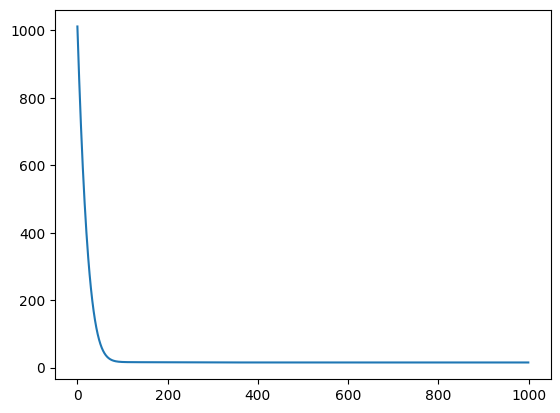

In [13]:
plt.plot(losses)
plt.show()

In [14]:
import pickle
with open("7_adam.pickle", "wb") as f:
    pickle.dump(losses, f)